In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pygeohash as pgh
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# 1. Loading all the data in the pandas dataframe oblects

In [2]:
blight_violations = pd.read_csv('..\data\_97bd1c1e5df9537bb13398c9898deed7_detroit-blight-violations.csv')
blight_violations

C:\Users\Asus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TicketID,TicketNumber,AgencyName,ViolName,ViolationStreetNumber,ViolationStreetName,MailingStreetNumber,MailingStreetName,MailingCity,MailingState,MailingZipCode,NonUsAddressCode,Country,TicketIssuedDT,TicketIssuedTime,HearingDT,CourtTime,ViolationCode,ViolDescription,Disposition,FineAmt,AdminFee,LateFee,StateFee,CleanUpCost,JudgmentAmt,PaymentStatus,Void,ViolationCategory,ViolationAddress,MailingAddress
0,26288,05000001DAH,Department of Public Works,"Group, LLC, Grand Holding",2566,GRAND BLVD,743,"Beaubien, Ste. 201",Detroit,MI,48226,NaN,NaN,01/01/38440 12:00:00 AM,12:00:00,01/01/38474 12:00:00 AM,9:00AM,22-2-20,Burning solid waste in open fires,Responsible By Determination,$1500.00,$20.00,$150.00,$10.00,$0.00,$1680.00,PAID IN FULL,0.0,0,"2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...","743 Beaubien\nDetroit, MI 48226\n(42.333730630..."
1,19800,05000025DAH,Department of Public Works,"JACKSON, RAECHELLE",19014,ASHTON,20501,HEYDEN,DETROIT,MI,48219,NaN,NaN,01/01/38383 12:00:00 AM,10:15:00,01/01/38425 12:00:00 AM,1:30PM,22-2-22,Bulk solid waste deposited more than 24 hours ...,Not responsible By Determination,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"19014 ASHTON\nDetroit, MI\n(42.429390762000025...","20501 HEYDEN\nDETROIT, MI 48219\n(42.442177633..."
2,19804,05000026DAH,Department of Public Works,"TALTON, CAROL ANN",18735,STAHELIN,18735,STAHELI N,DETROIT,MI,48219,NaN,NaN,01/01/38383 12:00:00 AM,10:35:00,01/01/38425 12:00:00 AM,1:30PM,22-2-22,Bulk solid waste deposited more than 24 hours ...,Responsible By Determination,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"18735 STAHELIN\nDetroit, MI\n(42.4287074590000...","18735 STAHELI N\nDETROIT, MI 48219\n(42.428707..."
3,20208,05000027DAH,Department of Public Works,"BONNER, DARRYL E.",20125,MONICA,25335,PEEKSKILL,SOUTHFIELD,MI,48043,NaN,NaN,01/01/38385 12:00:00 AM,10:45:00,01/01/38422 12:00:00 AM,1:30PM,22-2-45,Violation of time limit for approved container...,Responsible By Default,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"20125 MONICA\nDetroit, MI\n(42.44169828400004,...","25335 PEEKSKILL\nSOUTHFIELD, MI 48043\n(42.475..."
4,20211,05000028DAH,Department of Public Works,"GREGORY, JAMES LEE",17397,PRAIRIE,17397,PRAIRIE,DETROIT,MI,48221,NaN,NaN,01/01/38385 12:00:00 AM,11:10:00,01/01/38422 12:00:00 AM,1:30PM,22-2-22,Bulk solid waste deposited more than 24 hours ...,Responsible By Default,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"17397 PRAIRIE\nDetroit, MI\n(42.42031769500005...","17397 PRAIRIE\nDETROIT, MI 48221\n(42.42031769..."
5,20628,05000029DAH,Department of Public Works,"BANK, WASHINGTON MUTUAL",17153,NORTHLAWN,11200,W.PARKLAND AVE.,MILWAUKEE,WI,53224,NaN,NaN,01/01/38387 12:00:00 AM,12:45:00,01/01/38422 12:00:00 AM,1:30PM,22-2-45,Violation of time limit for approved container...,Not responsible By Dismissal,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"17153 NORTHLAWN\nDetroit, MI\n(42.417888685000...","11200 W PARKLAND AVE\nMILWAUKEE, WI 53224\n(43..."
6,20631,05000030DAH,Department of Public Works,"BANK, WASHINGTON MUTUAL",17153,NORTHLAWN,11200,W.PARKLAND AVE.,MILWAUKEE,WI,53224,NaN,NaN,01/01/38387 12:00:00 AM,12:45:00,01/01/38422 12:00:00 AM,1:30PM,22-2-22,Bulk solid waste deposited more than 24 hours ...,Not responsible By Dismissal,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"17153 NORTHLAWN\nDetroit, MI\n(42.417888685000...","11200 W PARKLAND AVE\nMILWAUKEE, WI 53224\n(43..."
7,20634,05000031DAH,Department of Public Works,"PRINCE, JO I.",17517,NORTHLAWN,17209,NORTHLAWN,DETROIT,MI,48221,NaN,NaN,01/01/38387 12:00:00 AM,13:05:00,01/01/38422 12:00:00 AM,1:30PM,22-2-22,Bulk solid waste deposited more than 24 hours ...,Responsible By Default,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"17517 NORTHLAWN\nDetroit, MI\n(42.420899430000...","17209 NORTHLAWN\nDETROIT, MI 48221\n(42.418658..."
8,20899,05000032DAH,Departme

In [3]:
blight_violations.shape

(307804, 31)

In [4]:
detroit_crime = pd.read_csv('..\data\_dcebfb2135a2bf5a6392493bd61aba22_detroit-crime.csv')
detroit_crime.head()


C:\Users\Asus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION
0,53256,1953933,1506030028.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,06/03/2015 12:00:00 AM,2,1007.0,10.0,City Council District 5,PETOSKEY-OTSEGO,5334.0,09100 PETOSKEY,-83.1221,42.3678,"PETOSKEY\n09100\n(42.3676, -83.1219)"
1,17631,1917717,1503010158.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,03/01/2015 12:00:00 AM,9,608.0,6.0,City Council District 7,GRANDALE,5452.0,00 PLYMOUTH AND MANSFIELD,-83.2035,42.3724,"00 PLYMOUTH AND MANSFIELD\n(42.3725, -83.2033)"
2,11207,1910955,1502080223.1,STOLEN VEHICLE,VEHICLE THEFT,24001.0,02/08/2015 12:00:00 AM,18,1105.0,11.0,City Council District 3,OUTER DRIVE VAN DYKE,5051.0,00 E 7 MILE VAN DYKE,-83.0241,42.4338,"00 E 7 MILE VAN DYKE\n(42.4339, -83.0241)"
3,116589,2018186,1511090188.1,WEAPONS OFFENSES,WEAPONS OFFENSE (OTHER),52003.0,11/09/2015 12:00:00 AM,12,210.0,2.0,City Council District 6,TIREMAN,NaN,06600 BARTON,-83.1381,42.3496,"BARTON\n06600\n(42.3494, -83.1379)"
4,85790,1986862,1508239803.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,08/14/2015 12:00:00 AM,7,309.0,3.0,City Council District 6,WEST CANFIELD,5204.0,00900 W WILLIS,-83.0692,42.3481,"W WILLIS\n00900\n(42.3481, -83.0693)"


In [5]:
detroit_crime.shape

(119931, 17)

In [6]:
detroit_311 = pd.read_csv('..\data\_dcebfb2135a2bf5a6392493bd61aba22_detroit-311.csv')
detroit_311.head()

,ticket_id,city,issue_type,ticket_status,issue_description,rating,ticket_closed_date_time,acknowledged_at,ticket_created_date_time,ticket_last_updated_date_time,address,lat,lng,location,image
0,1516722,City of Detroit,Clogged Drain,Acknowledged,"Two drains one on each side of street, street ...",3,NaN,03/06/2015 10:03:38 PM,03/06/2015 09:57:52 PM,04/12/2015 01:01:10 AM,"13120-13130 Ilene Street Detroit, MI 48238, USA",42.383998,-83.161039,"(42.3839977668, -83.1610385642)",NaN
1,1525361,City of Detroit,Clogged Drain,Acknowledged,standing water on lumplin,2,NaN,03/11/2015 04:23:11 PM,03/11/2015 04:14:29 PM,04/07/2015 02:04:44 PM,"1485 E. Outer Drive Detroit, Michigan",42.440471,-83.080919,"(42.4404708, -83.080919)",NaN
2,1525218,City of Detroit,Clogged Drain,Closed,CITZEN CALLED TO REPORT CLOGGED DRAINS,2,08/15/2015 12:03:43 AM,03/11/2015 03:39:05 PM,03/11/2015 03:26:20 PM,08/15/2015 12:03:44 AM,"15460 Eastburn Detroit, Michigan",42.445244,-82.962038,"(42.445244, -82.962038)",NaN
3,1525214,City of Detroit,Clogged Drain,Acknowledged,Citizen called DWSD to report clogged drain,3,NaN,03/11/2015 03:35:02 PM,03/11/2015 03:22:42 PM,06/07/2015 10:07:48 PM,"17541 Mendota St Detroit, Michigan",42.421043,-83.166194,"(42.421043, -83.166194)",NaN
4,1525142,City of Detroit,Clogged Drain,Acknowledged,@ THE CORNER OF GRIGGS & MARGARETA,2,NaN,03/11/2015 03:04:59 PM,03/11/2015 02:53:23 PM,03/11/2015 03:04:59 PM,"Griggs Detroit, Michigan",42.402033,-83.162874,"(42.4020334, -83.1628741)",NaN


In [7]:
detroit_311.shape

(19680, 15)

In [8]:
detroits_permits = pd.read_csv("..\data\_dcebfb2135a2bf5a6392493bd61aba22_detroit-demolition-permits.tsv", sep = '\t')
detroits_permits.head()

,PERMIT_NO,PERMIT_APPLIED,PERMIT_ISSUED,PERMIT_EXPIRES,SITE_ADDRESS,BETWEEN1,PARCEL_NO,LOT_NUMBER,SUBDIVISION,CASE_TYPE,CASE_DESCRIPTION,LEGAL_USE,ESTIMATED_COST,PARCEL_SIZE,PARCEL_CLUSTER_SECTOR,STORIES,PARCEL_FLOOR_AREA,PARCEL_GROUND_AREA,PRC_AKA_ADDRESS,BLD_PERMIT_TYPE,PERMIT_DESCRIPTION,BLD_PERMIT_DESC,BLD_TYPE_USE,RESIDENTIAL,DESCRIPTION,BLD_TYPE_CONST_COD,BLD_ZONING_DIST,BLD_USE_GROUP,BLD_BASEMENT,FEE_TYPE,CSM_CASENO,CSF_CREATED_BY,SEQ_NO,PCF_AMT_PD,PCF_AMT_DUE,PCF_UPDATED,OWNER_LAST_NAME,OWNER_FIRST_NAME,OWNER_ADDRESS1,OWNER_ADDRESS2,OWNER_CITY,OWNER_STATE,OWNER_ZIP,CONTRACTOR_LAST_NAME,CONTRACTOR_FIRST_NAME,CONTRACTOR_ADDRESS1,CONTRACTOR_ADDRESS2,CONTRACTOR_CITY,CONTRACTOR_STATE,CONTRACTOR_ZIP,CONDITION_FOR_APPROVAL,site_location,owner_location,contractor_location,geom
0,BLD2015-03955,8/28/15,8/28/15,NaN,4331 BARHAM,BETWEEN VOIGHT AND WAVENEY,21 65525-6,S15,NaN,BLD,Building Permit,I - FAM DWLG,NaN,5184.0,3.0,NaN,0.0,829.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03955,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
1,BLD2015-04083,8/28/15,8/28/15,NaN,9707 BESSEMORE,BETWEEN VINTON AND GRATIOT,19 2312.,40,NaN,BLD,Building Permit,SINGLE FAMILY DWELLING,NaN,3006.0,1.0,1.0,0.0,799.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R1,R3,NaN,WPMT,BLD2015-04083,B-RB,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"9707 BESSEMORE\nDetroit, MI\n(42.395122, -83.0...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
2,BLD2015-03976,8/28/15,8/28/15,NaN,5315 BERKSHIRE,BETWEEN SOUTHAMPTON AND FRANKFORT,21 69321.,445,NaN,BLD,Building Permit,I - FAM DWLG,NaN,4487.0,3.0,NaN,0.0,675.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03976,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"5315 BERKSHIRE\nDetroit, MI\n(42.40322, -82.94...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
3,BLD2015-03781,8/28/15,8/28/15,NaN,16670 BRINGARD DR,BETWEEN CUSHING AND SHAKESPEARE,21 25930.,97,NaN,BLD,Building Permit,I - FAM DWLG,NaN,5532.0,2.0,NaN,0.0,0.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03781,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"16670 BRINGARD DR\nDetroit, MI\n(42.44664, -82...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN
4,BLD2015-03677,8/28/15,8/28/15,NaN,1454 BEATRICE,BETWEEN TORONTO AND GILROY,20 12871.012,21,NaN,BLD,Building Permit,1 - FAM DWLG,NaN,5184.0,5.0,NaN,0.0,725.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03677,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"1454 BEATRICE\nDetroit, MI\n(42.276956, -83.14...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN


In [9]:
detroits_permits.shape

(7133, 55)

## Derive a list of building
Creating Id key for all the incidents

In [10]:
detroits_permits = pd.read_csv("..\data\_dcebfb2135a2bf5a6392493bd61aba22_detroit-demolition-permits.tsv", sep = '\t')
Start_Id , End_Id = 0 , len(detroits_permits)
detroits_permits['Unique_Id'] = range(Start_Id, End_Id)

In [11]:
detroits_permits.head()

,PERMIT_NO,PERMIT_APPLIED,PERMIT_ISSUED,PERMIT_EXPIRES,SITE_ADDRESS,BETWEEN1,PARCEL_NO,LOT_NUMBER,SUBDIVISION,CASE_TYPE,CASE_DESCRIPTION,LEGAL_USE,ESTIMATED_COST,PARCEL_SIZE,PARCEL_CLUSTER_SECTOR,STORIES,PARCEL_FLOOR_AREA,PARCEL_GROUND_AREA,PRC_AKA_ADDRESS,BLD_PERMIT_TYPE,PERMIT_DESCRIPTION,BLD_PERMIT_DESC,BLD_TYPE_USE,RESIDENTIAL,DESCRIPTION,BLD_TYPE_CONST_COD,BLD_ZONING_DIST,BLD_USE_GROUP,BLD_BASEMENT,FEE_TYPE,CSM_CASENO,CSF_CREATED_BY,SEQ_NO,PCF_AMT_PD,PCF_AMT_DUE,PCF_UPDATED,OWNER_LAST_NAME,OWNER_FIRST_NAME,OWNER_ADDRESS1,OWNER_ADDRESS2,OWNER_CITY,OWNER_STATE,OWNER_ZIP,CONTRACTOR_LAST_NAME,CONTRACTOR_FIRST_NAME,CONTRACTOR_ADDRESS1,CONTRACTOR_ADDRESS2,CONTRACTOR_CITY,CONTRACTOR_STATE,CONTRACTOR_ZIP,CONDITION_FOR_APPROVAL,site_location,owner_location,contractor_location,geom,Unique_Id
0,BLD2015-03955,8/28/15,8/28/15,NaN,4331 BARHAM,BETWEEN VOIGHT AND WAVENEY,21 65525-6,S15,NaN,BLD,Building Permit,I - FAM DWLG,NaN,5184.0,3.0,NaN,0.0,829.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03955,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,0
1,BLD2015-04083,8/28/15,8/28/15,NaN,9707 BESSEMORE,BETWEEN VINTON AND GRATIOT,19 2312.,40,NaN,BLD,Building Permit,SINGLE FAMILY DWELLING,NaN,3006.0,1.0,1.0,0.0,799.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R1,R3,NaN,WPMT,BLD2015-04083,B-RB,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"9707 BESSEMORE\nDetroit, MI\n(42.395122, -83.0...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,1
2,BLD2015-03976,8/28/15,8/28/15,NaN,5315 BERKSHIRE,BETWEEN SOUTHAMPTON AND FRANKFORT,21 69321.,445,NaN,BLD,Building Permit,I - FAM DWLG,NaN,4487.0,3.0,NaN,0.0,675.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03976,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"5315 BERKSHIRE\nDetroit, MI\n(42.40322, -82.94...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,2
3,BLD2015-03781,8/28/15,8/28/15,NaN,16670 BRINGARD DR,BETWEEN CUSHING AND SHAKESPEARE,21 25930.,97,NaN,BLD,Building Permit,I - FAM DWLG,NaN,5532.0,2.0,NaN,0.0,0.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03781,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"16670 BRINGARD DR\nDetroit, MI\n(42.44664, -82...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,3
4,BLD2015-03677,8/28/15,8/28/15,NaN,1454 BEATRICE,BETWEEN TORONTO AND GILROY,20 12871.012,21,NaN,BLD,Building Permit,1 - FAM DWLG,NaN,5184.0,5.0,NaN,0.0,725.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03677,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"1454 BEATRICE\nDetroit, MI\n(42.276956, -83.14...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,4


In [12]:
blight_violations = pd.read_csv('..\data\_97bd1c1e5df9537bb13398c9898deed7_detroit-blight-violations.csv')
Start_Id += len(detroits_permits)
End_Id += len(blight_violations)
blight_violations['Unique_Id'] = range(Start_Id, End_Id)

In [13]:
blight_violations.head()

,TicketID,TicketNumber,AgencyName,ViolName,ViolationStreetNumber,ViolationStreetName,MailingStreetNumber,MailingStreetName,MailingCity,MailingState,MailingZipCode,NonUsAddressCode,Country,TicketIssuedDT,TicketIssuedTime,HearingDT,CourtTime,ViolationCode,ViolDescription,Disposition,FineAmt,AdminFee,LateFee,StateFee,CleanUpCost,JudgmentAmt,PaymentStatus,Void,ViolationCategory,ViolationAddress,MailingAddress,Unique_Id
0,26288,05000001DAH,Department of Public Works,"Group, LLC, Grand Holding",2566,GRAND BLVD,743,"Beaubien, Ste. 201",Detroit,MI,48226,NaN,NaN,01/01/38440 12:00:00 AM,12:00:00,01/01/38474 12:00:00 AM,9:00AM,22-2-20,Burning solid waste in open fires,Responsible By Determination,$1500.00,$20.00,$150.00,$10.00,$0.00,$1680.00,PAID IN FULL,0.0,0,"2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...","743 Beaubien\nDetroit, MI 48226\n(42.333730630...",7133
1,19800,05000025DAH,Department of Public Works,"JACKSON, RAECHELLE",19014,ASHTON,20501,HEYDEN,DETROIT,MI,48219,NaN,NaN,01/01/38383 12:00:00 AM,10:15:00,01/01/38425 12:00:00 AM,1:30PM,22-2-22,Bulk solid waste deposited more than 24 hours ...,Not responsible By Determination,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"19014 ASHTON\nDetroit, MI\n(42.429390762000025...","20501 HEYDEN\nDETROIT, MI 48219\n(42.442177633...",7134
2,19804,05000026DAH,Department of Public Works,"TALTON, CAROL ANN",18735,STAHELIN,18735,STAHELI N,DETROIT,MI,48219,NaN,NaN,01/01/38383 12:00:00 AM,10:35:00,01/01/38425 12:00:00 AM,1:30PM,22-2-22,Bulk solid waste deposited more than 24 hours ...,Responsible By Determination,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"18735 STAHELIN\nDetroit, MI\n(42.4287074590000...","18735 STAHELI N\nDETROIT, MI 48219\n(42.428707...",7135
3,20208,05000027DAH,Department of Public Works,"BONNER, DARRYL E.",20125,MONICA,25335,PEEKSKILL,SOUTHFIELD,MI,48043,NaN,NaN,01/01/38385 12:00:00 AM,10:45:00,01/01/38422 12:00:00 AM,1:30PM,22-2-45,Violation of time limit for approved container...,Responsible By Default,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"20125 MONICA\nDetroit, MI\n(42.44169828400004,...","25335 PEEKSKILL\nSOUTHFIELD, MI 48043\n(42.475...",7136
4,20211,05000028DAH,Department of Public Works,"GREGORY, JAMES LEE",17397,PRAIRIE,17397,PRAIRIE,DETROIT,MI,48221,NaN,NaN,01/01/38385 12:00:00 AM,11:10:00,01/01/38422 12:00:00 AM,1:30PM,22-2-22,Bulk solid waste deposited more than 24 hours ...,Responsible By Default,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"17397 PRAIRIE\nDetroit, MI\n(42.42031769500005...","17397 PRAIRIE\nDETROIT, MI 48221\n(42.42031769...",7137


In [14]:
len(detroits_permits)

7133

In [15]:
detroit_crime = pd.read_csv('..\data\_dcebfb2135a2bf5a6392493bd61aba22_detroit-crime.csv')
Start_Id += len(blight_violations)
End_Id += len(detroit_crime)
detroit_crime['Unique_id'] = range(Start_Id, End_Id)

In [16]:
detroit_crime.head()

,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION,Unique_id
0,53256,1953933,1506030028.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,06/03/2015 12:00:00 AM,2,1007.0,10.0,City Council District 5,PETOSKEY-OTSEGO,5334.0,09100 PETOSKEY,-83.1221,42.3678,"PETOSKEY\n09100\n(42.3676, -83.1219)",314937
1,17631,1917717,1503010158.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,03/01/2015 12:00:00 AM,9,608.0,6.0,City Council District 7,GRANDALE,5452.0,00 PLYMOUTH AND MANSFIELD,-83.2035,42.3724,"00 PLYMOUTH AND MANSFIELD\n(42.3725, -83.2033)",314938
2,11207,1910955,1502080223.1,STOLEN VEHICLE,VEHICLE THEFT,24001.0,02/08/2015 12:00:00 AM,18,1105.0,11.0,City Council District 3,OUTER DRIVE VAN DYKE,5051.0,00 E 7 MILE VAN DYKE,-83.0241,42.4338,"00 E 7 MILE VAN DYKE\n(42.4339, -83.0241)",314939
3,116589,2018186,1511090188.1,WEAPONS OFFENSES,WEAPONS OFFENSE (OTHER),52003.0,11/09/2015 12:00:00 AM,12,210.0,2.0,City Council District 6,TIREMAN,NaN,06600 BARTON,-83.1381,42.3496,"BARTON\n06600\n(42.3494, -83.1379)",314940
4,85790,1986862,1508239803.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,08/14/2015 12:00:00 AM,7,309.0,3.0,City Council District 6,WEST CANFIELD,5204.0,00900 W WILLIS,-83.0692,42.3481,"W WILLIS\n00900\n(42.3481, -83.0693)",314941


In [17]:
detroit_311 = pd.read_csv('..\data\_dcebfb2135a2bf5a6392493bd61aba22_detroit-311.csv')
Start_Id += len(detroit_crime)
End_Id += len(detroit_311)
detroit_311['Unique_Id'] = range(Start_Id, End_Id)

In [18]:
detroit_311.head()

,ticket_id,city,issue_type,ticket_status,issue_description,rating,ticket_closed_date_time,acknowledged_at,ticket_created_date_time,ticket_last_updated_date_time,address,lat,lng,location,image,Unique_Id
0,1516722,City of Detroit,Clogged Drain,Acknowledged,"Two drains one on each side of street, street ...",3,NaN,03/06/2015 10:03:38 PM,03/06/2015 09:57:52 PM,04/12/2015 01:01:10 AM,"13120-13130 Ilene Street Detroit, MI 48238, USA",42.383998,-83.161039,"(42.3839977668, -83.1610385642)",NaN,434868
1,1525361,City of Detroit,Clogged Drain,Acknowledged,standing water on lumplin,2,NaN,03/11/2015 04:23:11 PM,03/11/2015 04:14:29 PM,04/07/2015 02:04:44 PM,"1485 E. Outer Drive Detroit, Michigan",42.440471,-83.080919,"(42.4404708, -83.080919)",NaN,434869
2,1525218,City of Detroit,Clogged Drain,Closed,CITZEN CALLED TO REPORT CLOGGED DRAINS,2,08/15/2015 12:03:43 AM,03/11/2015 03:39:05 PM,03/11/2015 03:26:20 PM,08/15/2015 12:03:44 AM,"15460 Eastburn Detroit, Michigan",42.445244,-82.962038,"(42.445244, -82.962038)",NaN,434870
3,1525214,City of Detroit,Clogged Drain,Acknowledged,Citizen called DWSD to report clogged drain,3,NaN,03/11/2015 03:35:02 PM,03/11/2015 03:22:42 PM,06/07/2015 10:07:48 PM,"17541 Mendota St Detroit, Michigan",42.421043,-83.166194,"(42.421043, -83.166194)",NaN,434871
4,1525142,City of Detroit,Clogged Drain,Acknowledged,@ THE CORNER OF GRIGGS & MARGARETA,2,NaN,03/11/2015 03:04:59 PM,03/11/2015 02:53:23 PM,03/11/2015 03:04:59 PM,"Griggs Detroit, Michigan",42.402033,-83.162874,"(42.4020334, -83.1628741)",NaN,434872


## Extracting Latitude-Longitude and Assigning Building Id

### Detroits-Permits

In [19]:
detroits_permits.head(1)

,PERMIT_NO,PERMIT_APPLIED,PERMIT_ISSUED,PERMIT_EXPIRES,SITE_ADDRESS,BETWEEN1,PARCEL_NO,LOT_NUMBER,SUBDIVISION,CASE_TYPE,CASE_DESCRIPTION,LEGAL_USE,ESTIMATED_COST,PARCEL_SIZE,PARCEL_CLUSTER_SECTOR,STORIES,PARCEL_FLOOR_AREA,PARCEL_GROUND_AREA,PRC_AKA_ADDRESS,BLD_PERMIT_TYPE,PERMIT_DESCRIPTION,BLD_PERMIT_DESC,BLD_TYPE_USE,RESIDENTIAL,DESCRIPTION,BLD_TYPE_CONST_COD,BLD_ZONING_DIST,BLD_USE_GROUP,BLD_BASEMENT,FEE_TYPE,CSM_CASENO,CSF_CREATED_BY,SEQ_NO,PCF_AMT_PD,PCF_AMT_DUE,PCF_UPDATED,OWNER_LAST_NAME,OWNER_FIRST_NAME,OWNER_ADDRESS1,OWNER_ADDRESS2,OWNER_CITY,OWNER_STATE,OWNER_ZIP,CONTRACTOR_LAST_NAME,CONTRACTOR_FIRST_NAME,CONTRACTOR_ADDRESS1,CONTRACTOR_ADDRESS2,CONTRACTOR_CITY,CONTRACTOR_STATE,CONTRACTOR_ZIP,CONDITION_FOR_APPROVAL,site_location,owner_location,contractor_location,geom,Unique_Id
0,BLD2015-03955,8/28/15,8/28/15,NaN,4331 BARHAM,BETWEEN VOIGHT AND WAVENEY,21 65525-6,S15,NaN,BLD,Building Permit,I - FAM DWLG,NaN,5184.0,3.0,NaN,0.0,829.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03955,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,0


### Define in which column to look for missing values and drop

In [20]:
detroits_permits.dropna(subset= ['site_location'], inplace=True)

In [21]:
detroits_permits.head(1)

,PERMIT_NO,PERMIT_APPLIED,PERMIT_ISSUED,PERMIT_EXPIRES,SITE_ADDRESS,BETWEEN1,PARCEL_NO,LOT_NUMBER,SUBDIVISION,CASE_TYPE,CASE_DESCRIPTION,LEGAL_USE,ESTIMATED_COST,PARCEL_SIZE,PARCEL_CLUSTER_SECTOR,STORIES,PARCEL_FLOOR_AREA,PARCEL_GROUND_AREA,PRC_AKA_ADDRESS,BLD_PERMIT_TYPE,PERMIT_DESCRIPTION,BLD_PERMIT_DESC,BLD_TYPE_USE,RESIDENTIAL,DESCRIPTION,BLD_TYPE_CONST_COD,BLD_ZONING_DIST,BLD_USE_GROUP,BLD_BASEMENT,FEE_TYPE,CSM_CASENO,CSF_CREATED_BY,SEQ_NO,PCF_AMT_PD,PCF_AMT_DUE,PCF_UPDATED,OWNER_LAST_NAME,OWNER_FIRST_NAME,OWNER_ADDRESS1,OWNER_ADDRESS2,OWNER_CITY,OWNER_STATE,OWNER_ZIP,CONTRACTOR_LAST_NAME,CONTRACTOR_FIRST_NAME,CONTRACTOR_ADDRESS1,CONTRACTOR_ADDRESS2,CONTRACTOR_CITY,CONTRACTOR_STATE,CONTRACTOR_ZIP,CONDITION_FOR_APPROVAL,site_location,owner_location,contractor_location,geom,Unique_Id
0,BLD2015-03955,8/28/15,8/28/15,NaN,4331 BARHAM,BETWEEN VOIGHT AND WAVENEY,21 65525-6,S15,NaN,BLD,Building Permit,I - FAM DWLG,NaN,5184.0,3.0,NaN,0.0,829.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03955,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,0


In [22]:
detroits_permits['Coordinates'] = detroits_permits['site_location'].map(lambda x: x.split('\n')[-1])
detroits_permits.dropna(subset=['Coordinates'], inplace=True)

In [23]:
detroits_permits.head(4)

,PERMIT_NO,PERMIT_APPLIED,PERMIT_ISSUED,PERMIT_EXPIRES,SITE_ADDRESS,BETWEEN1,PARCEL_NO,LOT_NUMBER,SUBDIVISION,CASE_TYPE,CASE_DESCRIPTION,LEGAL_USE,ESTIMATED_COST,PARCEL_SIZE,PARCEL_CLUSTER_SECTOR,STORIES,PARCEL_FLOOR_AREA,PARCEL_GROUND_AREA,PRC_AKA_ADDRESS,BLD_PERMIT_TYPE,PERMIT_DESCRIPTION,BLD_PERMIT_DESC,BLD_TYPE_USE,RESIDENTIAL,DESCRIPTION,BLD_TYPE_CONST_COD,BLD_ZONING_DIST,BLD_USE_GROUP,BLD_BASEMENT,FEE_TYPE,CSM_CASENO,CSF_CREATED_BY,SEQ_NO,PCF_AMT_PD,PCF_AMT_DUE,PCF_UPDATED,OWNER_LAST_NAME,OWNER_FIRST_NAME,OWNER_ADDRESS1,OWNER_ADDRESS2,OWNER_CITY,OWNER_STATE,OWNER_ZIP,CONTRACTOR_LAST_NAME,CONTRACTOR_FIRST_NAME,CONTRACTOR_ADDRESS1,CONTRACTOR_ADDRESS2,CONTRACTOR_CITY,CONTRACTOR_STATE,CONTRACTOR_ZIP,CONDITION_FOR_APPROVAL,site_location,owner_location,contractor_location,geom,Unique_Id,Coordinates
0,BLD2015-03955,8/28/15,8/28/15,NaN,4331 BARHAM,BETWEEN VOIGHT AND WAVENEY,21 65525-6,S15,NaN,BLD,Building Permit,I - FAM DWLG,NaN,5184.0,3.0,NaN,0.0,829.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03955,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,0,"(42.394106, -82.9474)"
1,BLD2015-04083,8/28/15,8/28/15,NaN,9707 BESSEMORE,BETWEEN VINTON AND GRATIOT,19 2312.,40,NaN,BLD,Building Permit,SINGLE FAMILY DWELLING,NaN,3006.0,1.0,1.0,0.0,799.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R1,R3,NaN,WPMT,BLD2015-04083,B-RB,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"9707 BESSEMORE\nDetroit, MI\n(42.395122, -83.0...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,1,"(42.395122, -83.005077)"
2,BLD2015-03976,8/28/15,8/28/15,NaN,5315 BERKSHIRE,BETWEEN SOUTHAMPTON AND FRANKFORT,21 69321.,445,NaN,BLD,Building Permit,I - FAM DWLG,NaN,4487.0,3.0,NaN,0.0,675.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03976,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"5315 BERKSHIRE\nDetroit, MI\n(42.40322, -82.94...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,2,"(42.40322, -82.946476)"
3,BLD2015-03781,8/28/15,8/28/15,NaN,16670 BRINGARD DR,BETWEEN CUSHING AND SHAKESPEARE,21 25930.,97,NaN,BLD,Building Permit,I - FAM DWLG,NaN,5532.0,2.0,NaN,0.0,0.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03781,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"16670 BRINGARD DR\nDetroit, MI\n(42.44664, -82...","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,3,"(42.44664, -82.947207)"


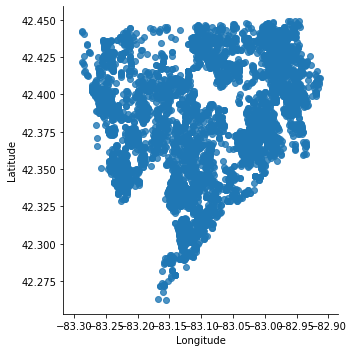

In [24]:
detroits_permits.dropna(subset=['site_location'], inplace=True)

detroits_permits['Coordinates'] = detroits_permits['site_location'].map(lambda x: x.split('\n')[-1])
detroits_permits['Coordinates'].replace('', np.nan, inplace=True)
detroits_permits.dropna(subset=['Coordinates'], inplace=True)

detroits_permits['Latitude'] = detroits_permits['Coordinates'].map(lambda x: x.split(',')[0][1:].strip()).astype(np.float)
detroits_permits['Longitude'] = detroits_permits['Coordinates'].map(lambda x: x.split(',')[1][:-1].strip()).astype(np.float)
detroits_permits = detroits_permits[(detroits_permits['Latitude'] >= 42.26) & (detroits_permits['Latitude'] <= 42.45)]
detroits_permits = detroits_permits[(detroits_permits['Longitude'] >= -83.29) & (detroits_permits['Longitude'] <= -82.91)]

sns.lmplot('Longitude', 'Latitude', data=detroits_permits, fit_reg=False)

In [25]:
detroits_permits['BuildingID'] = detroits_permits.apply(lambda row: pgh.encode(row['Latitude'], row['Longitude'], precision=7), axis=1)
detroits_permits.head(1)

,PERMIT_NO,PERMIT_APPLIED,PERMIT_ISSUED,PERMIT_EXPIRES,SITE_ADDRESS,BETWEEN1,PARCEL_NO,LOT_NUMBER,SUBDIVISION,CASE_TYPE,CASE_DESCRIPTION,LEGAL_USE,ESTIMATED_COST,PARCEL_SIZE,PARCEL_CLUSTER_SECTOR,STORIES,PARCEL_FLOOR_AREA,PARCEL_GROUND_AREA,PRC_AKA_ADDRESS,BLD_PERMIT_TYPE,PERMIT_DESCRIPTION,BLD_PERMIT_DESC,BLD_TYPE_USE,RESIDENTIAL,DESCRIPTION,BLD_TYPE_CONST_COD,BLD_ZONING_DIST,BLD_USE_GROUP,BLD_BASEMENT,FEE_TYPE,CSM_CASENO,CSF_CREATED_BY,SEQ_NO,PCF_AMT_PD,PCF_AMT_DUE,PCF_UPDATED,OWNER_LAST_NAME,OWNER_FIRST_NAME,OWNER_ADDRESS1,OWNER_ADDRESS2,OWNER_CITY,OWNER_STATE,OWNER_ZIP,CONTRACTOR_LAST_NAME,CONTRACTOR_FIRST_NAME,CONTRACTOR_ADDRESS1,CONTRACTOR_ADDRESS2,CONTRACTOR_CITY,CONTRACTOR_STATE,CONTRACTOR_ZIP,CONDITION_FOR_APPROVAL,site_location,owner_location,contractor_location,geom,Unique_Id,Coordinates,Latitude,Longitude,BuildingID
0,BLD2015-03955,8/28/15,8/28/15,NaN,4331 BARHAM,BETWEEN VOIGHT AND WAVENEY,21 65525-6,S15,NaN,BLD,Building Permit,I - FAM DWLG,NaN,5184.0,3.0,NaN,0.0,829.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03955,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,0,"(42.394106, -82.9474)",42.394106,-82.9474,dpt10mx


### Detroits_Violations

In [26]:
blight_violations.head(1)

,TicketID,TicketNumber,AgencyName,ViolName,ViolationStreetNumber,ViolationStreetName,MailingStreetNumber,MailingStreetName,MailingCity,MailingState,MailingZipCode,NonUsAddressCode,Country,TicketIssuedDT,TicketIssuedTime,HearingDT,CourtTime,ViolationCode,ViolDescription,Disposition,FineAmt,AdminFee,LateFee,StateFee,CleanUpCost,JudgmentAmt,PaymentStatus,Void,ViolationCategory,ViolationAddress,MailingAddress,Unique_Id
0,26288,05000001DAH,Department of Public Works,"Group, LLC, Grand Holding",2566,GRAND BLVD,743,"Beaubien, Ste. 201",Detroit,MI,48226,NaN,NaN,01/01/38440 12:00:00 AM,12:00:00,01/01/38474 12:00:00 AM,9:00AM,22-2-20,Burning solid waste in open fires,Responsible By Determination,$1500.00,$20.00,$150.00,$10.00,$0.00,$1680.00,PAID IN FULL,0.0,0,"2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...","743 Beaubien\nDetroit, MI 48226\n(42.333730630...",7133


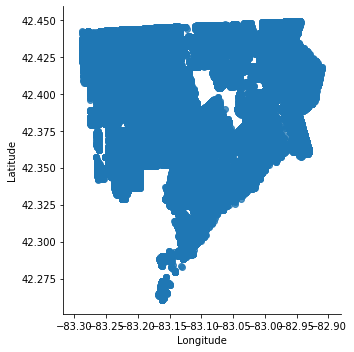

In [27]:
blight_violations.dropna(subset=['ViolationAddress'], inplace=True)
blight_violations['Coordinates'] = blight_violations['ViolationAddress'].apply(lambda x: x.split('\n')[-1])
blight_violations.dropna(subset=['Coordinates'], inplace=True)

blight_violations['Latitude'] = blight_violations['Coordinates'].apply(lambda x: x.split(',')[0][1:].strip()).astype(np.float)
blight_violations['Longitude'] = blight_violations['Coordinates'].apply(lambda x: x.split(',')[1][:-1].strip()).astype(np.float)
blight_violations = blight_violations[(blight_violations['Latitude'] >= 42.26) & (blight_violations['Latitude'] <= 42.45)]
blight_violations = blight_violations[(blight_violations['Longitude'] >= -83.29) & (blight_violations['Longitude'] <= -82.91)]

sns.lmplot('Longitude', 'Latitude', data=blight_violations, fit_reg=False)



In [28]:
blight_violations['BuildingID'] = blight_violations.apply(lambda row: pgh.encode(row['Latitude'], row['Longitude'], precision=7), axis=1)
blight_violations.head(1)

,TicketID,TicketNumber,AgencyName,ViolName,ViolationStreetNumber,ViolationStreetName,MailingStreetNumber,MailingStreetName,MailingCity,MailingState,MailingZipCode,NonUsAddressCode,Country,TicketIssuedDT,TicketIssuedTime,HearingDT,CourtTime,ViolationCode,ViolDescription,Disposition,FineAmt,AdminFee,LateFee,StateFee,CleanUpCost,JudgmentAmt,PaymentStatus,Void,ViolationCategory,ViolationAddress,MailingAddress,Unique_Id,Coordinates,Latitude,Longitude,BuildingID
0,26288,05000001DAH,Department of Public Works,"Group, LLC, Grand Holding",2566,GRAND BLVD,743,"Beaubien, Ste. 201",Detroit,MI,48226,NaN,NaN,01/01/38440 12:00:00 AM,12:00:00,01/01/38474 12:00:00 AM,9:00AM,22-2-20,Burning solid waste in open fires,Responsible By Determination,$1500.00,$20.00,$150.00,$10.00,$0.00,$1680.00,PAID IN FULL,0.0,0,"2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...","743 Beaubien\nDetroit, MI 48226\n(42.333730630...",7133,"(42.36318237000006, -83.09167672099994)",42.363182,-83.091677,dpsbvpy


### Detroit_Crime

In [29]:
detroit_crime.head(1)

,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION,Unique_id
0,53256,1953933,1506030028.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,06/03/2015 12:00:00 AM,2,1007.0,10.0,City Council District 5,PETOSKEY-OTSEGO,5334.0,09100 PETOSKEY,-83.1221,42.3678,"PETOSKEY\n09100\n(42.3676, -83.1219)",314937


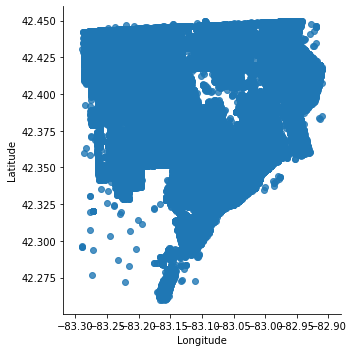

In [30]:
detroit_crime['Coordinates'] = detroit_crime['LOCATION'].map(lambda x: x.split('\n')[-1])
detroit_crime['Coordinates'] = detroit_crime['Coordinates'].replace('', np.nan)
detroit_crime.dropna(subset=['Coordinates'], inplace=True)

detroit_crime['Latitude'] = detroit_crime['Coordinates'].map(lambda x: x.split(',')[0][1:].strip()).astype(np.float)
detroit_crime['Longitude'] = detroit_crime['Coordinates'].map(lambda x: x.split(',')[1][:-1].strip()).astype(np.float)
detroit_crime = detroit_crime[(detroit_crime['Latitude'] >= 42.26) & (detroit_crime['Latitude'] <= 42.45)]
detroit_crime = detroit_crime[(detroit_crime['Longitude'] >= -83.29) & (detroit_crime['Longitude'] <= -82.91)]

sns.lmplot('Longitude', 'Latitude', data=detroit_crime, fit_reg=False)

In [31]:
detroit_crime['BuildingID'] = detroit_crime.apply(lambda row: pgh.encode(row['Latitude'], row['Longitude'], precision=7), axis=1)
detroit_crime.head(1)

,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION,Unique_id,Coordinates,Latitude,Longitude,BuildingID
0,53256,1953933,1506030028.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,06/03/2015 12:00:00 AM,2,1007.0,10.0,City Council District 5,PETOSKEY-OTSEGO,5334.0,09100 PETOSKEY,-83.1221,42.3678,"PETOSKEY\n09100\n(42.3676, -83.1219)",314937,"(42.3676, -83.1219)",42.3676,-83.1219,dpsch8b


### Detroit_311 Calls

In [32]:
detroit_311.head(1)

,ticket_id,city,issue_type,ticket_status,issue_description,rating,ticket_closed_date_time,acknowledged_at,ticket_created_date_time,ticket_last_updated_date_time,address,lat,lng,location,image,Unique_Id
0,1516722,City of Detroit,Clogged Drain,Acknowledged,"Two drains one on each side of street, street ...",3,NaN,03/06/2015 10:03:38 PM,03/06/2015 09:57:52 PM,04/12/2015 01:01:10 AM,"13120-13130 Ilene Street Detroit, MI 48238, USA",42.383998,-83.161039,"(42.3839977668, -83.1610385642)",NaN,434868


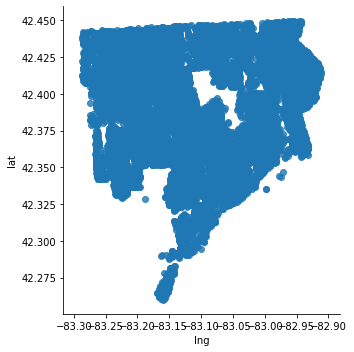

In [33]:
detroit_311 = detroit_311[(detroit_311['lat'] >= 42.26) & (detroit_311['lat'] <= 42.45)]
detroit_311 = detroit_311[(detroit_311['lng'] >= -83.29) & (detroit_311['lng'] <= -82.91)]

sns.lmplot('lng', 'lat', data=detroit_311, fit_reg=False)

In [34]:
detroit_311['BuildingID'] = detroit_311.apply(lambda row: pgh.encode(row['lat'], row['lng'], precision=7), axis=1)
detroit_311.head(1)

,ticket_id,city,issue_type,ticket_status,issue_description,rating,ticket_closed_date_time,acknowledged_at,ticket_created_date_time,ticket_last_updated_date_time,address,lat,lng,location,image,Unique_Id,BuildingID
0,1516722,City of Detroit,Clogged Drain,Acknowledged,"Two drains one on each side of street, street ...",3,NaN,03/06/2015 10:03:38 PM,03/06/2015 09:57:52 PM,04/12/2015 01:01:10 AM,"13120-13130 Ilene Street Detroit, MI 48238, USA",42.383998,-83.161039,"(42.3839977668, -83.1610385642)",NaN,434868,dpsc5eg


# 2. Creating Labelled data

## 2.1 constructing training set

### 2.1(a) Getting Blighted Building

In [35]:
detroits_permits['BLD_PERMIT_TYPE'].unique()

array(['Dismantle', 'DISM'], dtype=object)

In [36]:
blighted_building = pd.DataFrame()
blighted_building['BuildingID'] = detroits_permits['BuildingID'].unique()
blighted_building['Blighted'] = 1
blighted_building.head()

,BuildingID,Blighted
0,dpt10mx,1
1,dpscpjv,1
2,dpt10x2,1
3,dpt12rp,1
4,dpsbebm,1


### 2.1(b) Getting Non-Blighted Building

In [37]:
non_blighted_building = pd.DataFrame()
building_ids = pd.concat([blight_violations['BuildingID'], detroit_crime['BuildingID'], detroit_311['BuildingID']], ignore_index=True)
non_blighted_building_ids = set(building_ids.unique().tolist()) - set(blighted_building['BuildingID'].tolist())

non_blighted_building['BuildingID'] = list(non_blighted_building_ids)
non_blighted_building['Blighted'] = 0
non_blighted_building.head()

,BuildingID,Blighted
0,dpsc4s5,0
1,dpsckh7,0
2,dpt10t1,0
3,dpsc4vw,0
4,dpt115y,0


## Creating Final Labelled data

In [38]:
label_df = pd.DataFrame()
label_df = pd.concat([blighted_building, non_blighted_building], ignore_index=True, axis=0)

In [39]:
len(label_df) == len(non_blighted_building) + len(blighted_building)

True

# 3. Feature Engineering

In [40]:
best_df = pd.DataFrame()
best_df['BuildingID'] = label_df['BuildingID']
best_df['Blighted'] = label_df['Blighted']
best_df.head(2)

,BuildingID,Blighted
0,dpt10mx,1
1,dpscpjv,1


## Features from Blight Violations data set

In [41]:
blight_violations.head()

,TicketID,TicketNumber,AgencyName,ViolName,ViolationStreetNumber,ViolationStreetName,MailingStreetNumber,MailingStreetName,MailingCity,MailingState,MailingZipCode,NonUsAddressCode,Country,TicketIssuedDT,TicketIssuedTime,HearingDT,CourtTime,ViolationCode,ViolDescription,Disposition,FineAmt,AdminFee,LateFee,StateFee,CleanUpCost,JudgmentAmt,PaymentStatus,Void,ViolationCategory,ViolationAddress,MailingAddress,Unique_Id,Coordinates,Latitude,Longitude,BuildingID
0,26288,05000001DAH,Department of Public Works,"Group, LLC, Grand Holding",2566,GRAND BLVD,743,"Beaubien, Ste. 201",Detroit,MI,48226,NaN,NaN,01/01/38440 12:00:00 AM,12:00:00,01/01/38474 12:00:00 AM,9:00AM,22-2-20,Burning solid waste in open fires,Responsible By Determination,$1500.00,$20.00,$150.00,$10.00,$0.00,$1680.00,PAID IN FULL,0.0,0,"2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...","743 Beaubien\nDetroit, MI 48226\n(42.333730630...",7133,"(42.36318237000006, -83.09167672099994)",42.363182,-83.091677,dpsbvpy
1,19800,05000025DAH,Department of Public Works,"JACKSON, RAECHELLE",19014,ASHTON,20501,HEYDEN,DETROIT,MI,48219,NaN,NaN,01/01/38383 12:00:00 AM,10:15:00,01/01/38425 12:00:00 AM,1:30PM,22-2-22,Bulk solid waste deposited more than 24 hours ...,Not responsible By Determination,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"19014 ASHTON\nDetroit, MI\n(42.429390762000025...","20501 HEYDEN\nDETROIT, MI 48219\n(42.442177633...",7134,"(42.429390762000025, -83.22039357799997)",42.429391,-83.220394,dpsc6k0
2,19804,05000026DAH,Department of Public Works,"TALTON, CAROL ANN",18735,STAHELIN,18735,STAHELI N,DETROIT,MI,48219,NaN,NaN,01/01/38383 12:00:00 AM,10:35:00,01/01/38425 12:00:00 AM,1:30PM,22-2-22,Bulk solid waste deposited more than 24 hours ...,Responsible By Determination,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"18735 STAHELIN\nDetroit, MI\n(42.4287074590000...","18735 STAHELI N\nDETROIT, MI 48219\n(42.428707...",7135,"(42.428707459000066, -83.22754809599996)",42.428707,-83.227548,dpsc65g
3,20208,05000027DAH,Department of Public Works,"BONNER, DARRYL E.",20125,MONICA,25335,PEEKSKILL,SOUTHFIELD,MI,48043,NaN,NaN,01/01/38385 12:00:00 AM,10:45:00,01/01/38422 12:00:00 AM,1:30PM,22-2-45,Violation of time limit for approved container...,Responsible By Default,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"20125 MONICA\nDetroit, MI\n(42.44169828400004,...","25335 PEEKSKILL\nSOUTHFIELD, MI 48043\n(42.475...",7136,"(42.44169828400004, -83.14501821599998)",42.441698,-83.145018,dpsc7yr
4,20211,05000028DAH,Department of Public Works,"GREGORY, JAMES LEE",17397,PRAIRIE,17397,PRAIRIE,DETROIT,MI,48221,NaN,NaN,01/01/38385 12:00:00 AM,11:10:00,01/01/38422 12:00:00 AM,1:30PM,22-2-22,Bulk solid waste deposited more than 24 hours ...,Responsible By Default,$100.00,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"17397 PRAIRIE\nDetroit, MI\n(42.42031769500005...","17397 PRAIRIE\nDETROIT, MI 48221\n(42.42031769...",7137,"(42.42031769500005, -83.14532817999998)",42.420318,-83.145328,dpsc7fr


In [42]:
def remove_dollar_sign(s):
    return float(str(s).replace('$', ''))

blight_violations['CleanJudgmentAmt'] = blight_violations['JudgmentAmt'].map(remove_dollar_sign)
judgement_amt = blight_violations[['BuildingID','CleanJudgmentAmt']].groupby('BuildingID', as_index=False).sum()
judgement_amt['CleanJudgmentAmt'].fillna(judgement_amt['CleanJudgmentAmt'].mean(), axis=0, inplace=True)

best_df = best_df.join(judgement_amt.set_index('BuildingID'), on='BuildingID', how='left', lsuffix= '_left', rsuffix= '_right')
best_df['CleanJudgmentAmt'].fillna(0, axis=0, inplace=True)
best_df.head(2)

,BuildingID,Blighted,CleanJudgmentAmt
0,dpt10mx,1,11405.0
1,dpscpjv,1,11105.0


In [43]:
blight_violations['ViolationCategory'].value_counts()

0    305774
1      2017
Name: ViolationCategory, dtype: int64

In [44]:
blight_violations['PaymentStatus'].value_counts()

NO PAYMENT APPLIED      244290
PAID IN FULL             44319
NO PAYMENT ON RECORD     14565
PARTIAL PAYMENT MADE      4617
Name: PaymentStatus, dtype: int64

In [45]:
cat0 = blight_violations[['BuildingID','ViolationCategory']][blight_violations['ViolationCategory']==0].groupby('BuildingID', as_index=False).count()
cat0.columns = ['BuildingID','#ViolationCategory0']
cat1 = blight_violations[['BuildingID','ViolationCategory']][blight_violations['ViolationCategory']==1].groupby('BuildingID', as_index=False).count()
cat1.columns = ['BuildingID','#ViolationCategory1']

best_df = best_df.join(cat0.set_index('BuildingID'), on='BuildingID')
best_df = best_df.join(cat1.set_index('BuildingID'), on='BuildingID')
best_df['#ViolationCategory0'].fillna(0, axis=0, inplace=True)
best_df['#ViolationCategory1'].fillna(0, axis=0, inplace=True)
best_df.head()

,BuildingID,Blighted,CleanJudgmentAmt,#ViolationCategory0,#ViolationCategory1
0,dpt10mx,1,11405.0,30.0,0.0
1,dpscpjv,1,11105.0,31.0,0.0
2,dpt10x2,1,13065.0,23.0,0.0
3,dpt12rp,1,9975.0,19.0,0.0
4,dpsbebm,1,0.0,0.0,0.0


In [46]:

violation_payment_status_dict = {}

for val in blight_violations['PaymentStatus'].unique():
    violation_payment_status_dict[val] = '#'+ val

for x in violation_payment_status_dict:
    cat = blight_violations[['BuildingID','PaymentStatus']][blight_violations['PaymentStatus']==x].groupby('BuildingID', as_index=False).count()
    cat.columns = ['BuildingID',violation_payment_status_dict[x]]
    best_df = best_df.join(cat.set_index('BuildingID'), on='BuildingID')
    best_df[violation_payment_status_dict[x]].fillna(0, axis=0, inplace=True)

In [47]:
count = blight_violations[['BuildingID', 'Unique_Id']].groupby('BuildingID', as_index=False).count()
count.columns = ['BuildingID','#Violation']

best_df = best_df.join(count.set_index('BuildingID'), on='BuildingID')
best_df['#Violation'].fillna(0, axis=0, inplace=True)
best_df.head(2)

,BuildingID,Blighted,CleanJudgmentAmt,#ViolationCategory0,#ViolationCategory1,#PAID IN FULL,#NO PAYMENT APPLIED,#PARTIAL PAYMENT MADE,#NO PAYMENT ON RECORD,#Violation
0,dpt10mx,1,11405.0,30.0,0.0,5.0,24.0,1.0,0.0,30.0
1,dpscpjv,1,11105.0,31.0,0.0,0.0,31.0,0.0,0.0,31.0


## Features from detroit-311 calls

In [48]:
detroit_311.head()

,ticket_id,city,issue_type,ticket_status,issue_description,rating,ticket_closed_date_time,acknowledged_at,ticket_created_date_time,ticket_last_updated_date_time,address,lat,lng,location,image,Unique_Id,BuildingID
0,1516722,City of Detroit,Clogged Drain,Acknowledged,"Two drains one on each side of street, street ...",3,NaN,03/06/2015 10:03:38 PM,03/06/2015 09:57:52 PM,04/12/2015 01:01:10 AM,"13120-13130 Ilene Street Detroit, MI 48238, USA",42.383998,-83.161039,"(42.3839977668, -83.1610385642)",NaN,434868,dpsc5eg
1,1525361,City of Detroit,Clogged Drain,Acknowledged,standing water on lumplin,2,NaN,03/11/2015 04:23:11 PM,03/11/2015 04:14:29 PM,04/07/2015 02:04:44 PM,"1485 E. Outer Drive Detroit, Michigan",42.440471,-83.080919,"(42.4404708, -83.080919)",NaN,434869,dpscmqn
2,1525218,City of Detroit,Clogged Drain,Closed,CITZEN CALLED TO REPORT CLOGGED DRAINS,2,08/15/2015 12:03:43 AM,03/11/2015 03:39:05 PM,03/11/2015 03:26:20 PM,08/15/2015 12:03:44 AM,"15460 Eastburn Detroit, Michigan",42.445244,-82.962038,"(42.445244, -82.962038)",NaN,434870,dpt12nu
3,1525214,City of Detroit,Clogged Drain,Acknowledged,Citizen called DWSD to report clogged drain,3,NaN,03/11/2015 03:35:02 PM,03/11/2015 03:22:42 PM,06/07/2015 10:07:48 PM,"17541 Mendota St Detroit, Michigan",42.421043,-83.166194,"(42.421043, -83.166194)",NaN,434871,dpsc7d8
4,1525142,City of Detroit,Clogged Drain,Acknowledged,@ THE CORNER OF GRIGGS & MARGARETA,2,NaN,03/11/2015 03:04:59 PM,03/11/2015 02:53:23 PM,03/11/2015 03:04:59 PM,"Griggs Detroit, Michigan",42.402033,-83.162874,"(42.4020334, -83.1628741)",NaN,434872,dpsc5x4


In [49]:
detroit_311['ticket_status'].value_counts()

Archived        9592
Closed          7007
Acknowledged    3010
Open              59
Name: ticket_status, dtype: int64

In [50]:
detroit_311['issue_type'].value_counts()

Illegal Dumping / Illegal Dump Sites                                                         3581
Tree Issue                                                                                   3545
Running Water in a Home or Building                                                          2653
Clogged Drain                                                                                2490
Potholes                                                                                     2398
Traffic Sign Issue                                                                           1030
Water Main Break                                                                              776
Fire Hydrant Issue                                                                            677
Abandoned Vehicle                                                                             638
Manhole Cover Issue                                                                           546
Traffic Signal Issue

In [51]:
detroit_311['rating'].value_counts()

2     9182
3     7853
4     2059
5      417
6       79
1       54
7       20
8        3
19       1
Name: rating, dtype: int64

In [52]:
call_ticket_status_dict = {}

for val in detroit_311['ticket_status'].unique():
    call_ticket_status_dict[val] = '#' + val
    
for x in call_ticket_status_dict:
    cat = detroit_311[['BuildingID','ticket_status']][detroit_311['ticket_status']==x].groupby('BuildingID', as_index=False).count()
    cat.columns = ['BuildingID',call_ticket_status_dict[x]]
    best_df = best_df.join(cat.set_index('BuildingID'), on='BuildingID')
    best_df[call_ticket_status_dict[x]].fillna(0, axis=0, inplace=True)

In [53]:
call_issue_type_dict = {}

for val in detroit_311['issue_type'].unique():
    call_issue_type_dict[val] = '#'+ val

for x in call_issue_type_dict:
    cat = detroit_311[['BuildingID','issue_type']][detroit_311['issue_type']==x].groupby('BuildingID', as_index=False).count()
    cat.columns = ['BuildingID',call_issue_type_dict[x]]
    best_df = best_df.join(cat.set_index('BuildingID'), on='BuildingID')
    best_df[call_issue_type_dict[x]].fillna(0, axis=0, inplace=True)

In [54]:
detroit_311['rating'] = detroit_311['rating'].astype(float)
rating = detroit_311[['BuildingID', 'rating']].groupby('BuildingID', as_index=False).agg('mean')
count.columns = ['BuildingID','MeanCallRating']

best_df = best_df.join(count.set_index('BuildingID'), on='BuildingID')
best_df['MeanCallRating'].fillna(0, axis=0, inplace=True)

In [55]:

count = detroit_311[['BuildingID', 'Unique_Id']].groupby('BuildingID', as_index=False).count()
count.columns = ['BuildingID','#Calls']

best_df = best_df.join(count.set_index('BuildingID'), on='BuildingID')
best_df['#Calls'].fillna(0, axis=0, inplace=True)
best_df.head()

,BuildingID,Blighted,CleanJudgmentAmt,#ViolationCategory0,#ViolationCategory1,#PAID IN FULL,#NO PAYMENT APPLIED,#PARTIAL PAYMENT MADE,#NO PAYMENT ON RECORD,#Violation,#Acknowledged,#Closed,#Open,#Archived,#Clogged Drain,#Tree Issue,#Manhole Cover Issue,#Water Main Break,#Abandoned Vehicle,#Fire Hydrant Issue,#Traffic Signal Issue,#Potholes,#Traffic Sign Issue,#Illegal Dumping / Illegal Dump Sites,#Running Water in a Home or Building,#Street Light Pole Down,"#Test (internal use only, public issue)",#Graffiti,"#Customer Service (internal use only, private issue)",#Residential Snow Removal Issue,"#Graffiti Abatement (internal use only, public issue)",#DPW - Debris Removal,#Trash Issue - Improper placement of refuse container between collections/left at curbside,#Trash Issue - Bulk waste deposited more than 24 hours before designated time,#Curbside Solid Waste Issue,#Detroit Land Bank Referral,#DPW - Other environmental,MeanCallRating,#Calls
0,dpt10mx,1,11405.0,30.0,0.0,5.0,24.0,1.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0
1,dpscpjv,1,11105.0,31.0,0.0,0.0,31.0,0.0,0.0,31.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,2.0
2,dpt10x2,1,13065.0,23.0,0.0,0.0,23.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0
3,dpt12rp,1,9975.0,19.0,0.0,4.0,15.0,0.0,0.0,19.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1.0
4,dpsbebm,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Feature from Detroit_crime

In [56]:
detroit_crime.head()

,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION,Unique_id,Coordinates,Latitude,Longitude,BuildingID
0,53256,1953933,1506030028.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,06/03/2015 12:00:00 AM,2,1007.0,10.0,City Council District 5,PETOSKEY-OTSEGO,5334.0,09100 PETOSKEY,-83.1221,42.3678,"PETOSKEY\n09100\n(42.3676, -83.1219)",314937,"(42.3676, -83.1219)",42.3676,-83.1219,dpsch8b
1,17631,1917717,1503010158.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,03/01/2015 12:00:00 AM,9,608.0,6.0,City Council District 7,GRANDALE,5452.0,00 PLYMOUTH AND MANSFIELD,-83.2035,42.3724,"00 PLYMOUTH AND MANSFIELD\n(42.3725, -83.2033)",314938,"(42.3725, -83.2033)",42.3725,-83.2033,dpsc49t
2,11207,1910955,1502080223.1,STOLEN VEHICLE,VEHICLE THEFT,24001.0,02/08/2015 12:00:00 AM,18,1105.0,11.0,City Council District 3,OUTER DRIVE VAN DYKE,5051.0,00 E 7 MILE VAN DYKE,-83.0241,42.4338,"00 E 7 MILE VAN DYKE\n(42.4339, -83.0241)",314939,"(42.4339, -83.0241)",42.4339,-83.0241,dpscqsz
3,116589,2018186,1511090188.1,WEAPONS OFFENSES,WEAPONS OFFENSE (OTHER),52003.0,11/09/2015 12:00:00 AM,12,210.0,2.0,City Council District 6,TIREMAN,NaN,06600 BARTON,-83.1381,42.3496,"BARTON\n06600\n(42.3494, -83.1379)",314940,"(42.3494, -83.1379)",42.3494,-83.1379,dpsbujk
4,85790,1986862,1508239803.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,08/14/2015 12:00:00 AM,7,309.0,3.0,City Council District 6,WEST CANFIELD,5204.0,00900 W WILLIS,-83.0692,42.3481,"W WILLIS\n00900\n(42.3481, -83.0693)",314941,"(42.3481, -83.0693)",42.3481,-83.0693,dpsbvtn


In [57]:
detroit_crime['CATEGORY'].value_counts()

TRAFFIC VIOLATIONS-MOTORCYCLE VIOLATIONS       29257
ASSAULT                                        16410
LARCENY                                        14106
DAMAGE TO PROPERTY                              9394
AGGRAVATED ASSAULT                              8256
BURGLARY                                        7746
STOLEN VEHICLE                                  6940
TRAFFIC VIOLATIONS-DRIVING ON SUSPENDED         5739
FRAUD                                           4891
ROBBERY                                         3179
DANGEROUS DRUGS                                 3101
OBSTRUCTING JUDICIARY                           1397
WEAPONS OFFENSES                                1254
ESCAPE                                           906
SOLICITATION                                     846
BRIBERY                                          832
ARSON                                            785
OUIL DISPOSE OF VEHICLE TO AVOID FORFEITURE      748
RUNAWAY                                       

In [58]:
crime_category_type_dict = {}

for val in detroit_crime['CATEGORY'].unique():
    crime_category_type_dict[val] = '#'+ val

for x in crime_category_type_dict:
    cat = detroit_crime[['BuildingID','CATEGORY']][detroit_crime['CATEGORY']==x].groupby('BuildingID', as_index=False).count()
    cat.columns = ['BuildingID',crime_category_type_dict[x]]
    best_df = best_df.join(cat.set_index('BuildingID'), on='BuildingID')
    best_df[crime_category_type_dict[x]].fillna(0, axis=0, inplace=True)

In [59]:
count = detroit_crime[['BuildingID', 'Unique_id']].groupby('BuildingID', as_index=False).count()
count.columns = ['BuildingID','#Crimes']

best_df = best_df.join(count.set_index('BuildingID'), on='BuildingID')
best_df['#Crimes'].fillna(0, axis=0, inplace=True)
best_df.head()

,BuildingID,Blighted,CleanJudgmentAmt,#ViolationCategory0,#ViolationCategory1,#PAID IN FULL,#NO PAYMENT APPLIED,#PARTIAL PAYMENT MADE,#NO PAYMENT ON RECORD,#Violation,#Acknowledged,#Closed,#Open,#Archived,#Clogged Drain,#Tree Issue,#Manhole Cover Issue,#Water Main Break,#Abandoned Vehicle,#Fire Hydrant Issue,#Traffic Signal Issue,#Potholes,#Traffic Sign Issue,#Illegal Dumping / Illegal Dump Sites,#Running Water in a Home or Building,#Street Light Pole Down,"#Test (internal use only, public issue)",#Graffiti,"#Customer Service (internal use only, private issue)",#Residential Snow Removal Issue,"#Graffiti Abatement (internal use only, public issue)",#DPW - Debris Removal,#Trash Issue - Improper placement of refuse container between collections/left at curbside,#Trash Issue - Bulk waste deposited more than 24 hours before designated time,#Curbside Solid Waste Issue,#Detroit Land Bank Referral,#DPW - Other environmental,MeanCallRating,#Calls,#ASSAULT,#LARCENY,#STOLEN VEHICLE,#WEAPONS OFFENSES,#TRAFFIC VIOLATIONS-MOTORCYCLE VIOLATIONS,#BURGLARY,#AGGRAVATED ASSAULT,#DAMAGE TO PROPERTY,#TRAFFIC VIOLATIONS-DRIVING ON SUSPENDED,#ROBBERY,#FRAUD,#OBSTRUCTING JUDICIARY,#DANGEROUS DRUGS,#HOMICIDE,#SOLICITATION,#OUIL DISPOSE OF VEHICLE TO AVOID FORFEITURE,#FAMILY OFFENSE,#ARSON,#ESCAPE,#OBSTRUCTING THE POLICE,#RUNAWAY,#BRIBERY,#KIDNAPING,#EXTORTION,#OTHER BURGLARY,#STOLEN PROPERTY,#HEALTH-SAFETY,#VAGRANCY (OTHER),#ENVIRONMENT,#EMBEZZLEMENT,#FORGERY,#CONSPIRACY BY COMPUTER,#ANTITRUST,#PUBLIC PEACE,#LIQUOR,#OUIL,#OBSCENITY,#SOVEREIGNTY,#TAX REVENUE,#NEGLIGENT HOMICIDE,#GAMBLING,#IMMIGRATION,#CONGRESS,#JUSTIFIABLE HOMICIDE,#REVOKED,#ELECTION LAWS,#DRUNKENNESS,#FELONY DEATH FROM FLEEING VEHICLE,#MISCELLANEOUS ARREST,#MILITARY,#Crimes
0,dpt10mx,1,11405.0,30.0,0.0,5.0,24.0,1.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,dpscpjv,1,11105.0,31.0,0.0,0.0,31.0,0.0,0.0,31.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,dpt10x2,1,13065.0,23.0,0.0,0.0,23.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3,dpt12rp,1,9975.0,19.0,0.0,4.0,15.0,0.0,0.0,19.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,dpsbebm,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


# 4. Model Training

In [60]:
X_best = best_df.drop(['BuildingID', 'Blighted'], axis=1)
y_best = best_df['Blighted']

X_train, X_test, y_train, y_test = train_test_split(X_best, y_best, test_size=0.3, stratify = y_best)

In [61]:
X_train.head()

,CleanJudgmentAmt,#ViolationCategory0,#ViolationCategory1,#PAID IN FULL,#NO PAYMENT APPLIED,#PARTIAL PAYMENT MADE,#NO PAYMENT ON RECORD,#Violation,#Acknowledged,#Closed,#Open,#Archived,#Clogged Drain,#Tree Issue,#Manhole Cover Issue,#Water Main Break,#Abandoned Vehicle,#Fire Hydrant Issue,#Traffic Signal Issue,#Potholes,#Traffic Sign Issue,#Illegal Dumping / Illegal Dump Sites,#Running Water in a Home or Building,#Street Light Pole Down,"#Test (internal use only, public issue)",#Graffiti,"#Customer Service (internal use only, private issue)",#Residential Snow Removal Issue,"#Graffiti Abatement (internal use only, public issue)",#DPW - Debris Removal,#Trash Issue - Improper placement of refuse container between collections/left at curbside,#Trash Issue - Bulk waste deposited more than 24 hours before designated time,#Curbside Solid Waste Issue,#Detroit Land Bank Referral,#DPW - Other environmental,MeanCallRating,#Calls,#ASSAULT,#LARCENY,#STOLEN VEHICLE,#WEAPONS OFFENSES,#TRAFFIC VIOLATIONS-MOTORCYCLE VIOLATIONS,#BURGLARY,#AGGRAVATED ASSAULT,#DAMAGE TO PROPERTY,#TRAFFIC VIOLATIONS-DRIVING ON SUSPENDED,#ROBBERY,#FRAUD,#OBSTRUCTING JUDICIARY,#DANGEROUS DRUGS,#HOMICIDE,#SOLICITATION,#OUIL DISPOSE OF VEHICLE TO AVOID FORFEITURE,#FAMILY OFFENSE,#ARSON,#ESCAPE,#OBSTRUCTING THE POLICE,#RUNAWAY,#BRIBERY,#KIDNAPING,#EXTORTION,#OTHER BURGLARY,#STOLEN PROPERTY,#HEALTH-SAFETY,#VAGRANCY (OTHER),#ENVIRONMENT,#EMBEZZLEMENT,#FORGERY,#CONSPIRACY BY COMPUTER,#ANTITRUST,#PUBLIC PEACE,#LIQUOR,#OUIL,#OBSCENITY,#SOVEREIGNTY,#TAX REVENUE,#NEGLIGENT HOMICIDE,#GAMBLING,#IMMIGRATION,#CONGRESS,#JUSTIFIABLE HOMICIDE,#REVOKED,#ELECTION LAWS,#DRUNKENNESS,#FELONY DEATH FROM FLEEING VEHICLE,#MISCELLANEOUS ARREST,#MILITARY,#Crimes
153,2165.0,8.0,0.0,2.0,6.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
5566,158280.0,128.0,0.0,8.0,118.0,0.0,2.0,128.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
15059,1720.0,6.0,0.0,0.0,5.0,0.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
84,14105.0,32.0,0.0,5.0,23.0,1.0,3.0,32.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
16402,530.0,3.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


## Random Forest

In [62]:
classifier = RandomForestClassifier(n_estimators=500, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

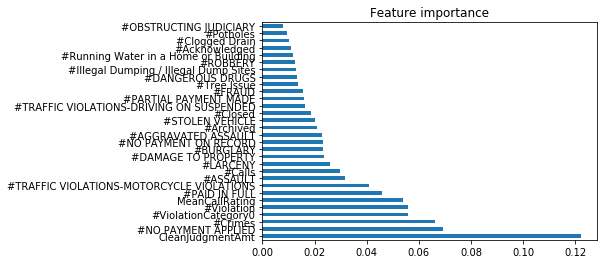

In [63]:
feature_importance = pd.Series(classifier.feature_importances_, index=X_best.columns)
feature_importance.sort_values(inplace=True, ascending=False)
feature_importance.head(30).plot(kind='barh', title='Feature importance')

In [64]:
sum(classifier.predict(X_test) == y_test) / float(len(y_test))

0.8124544792425346

In [65]:
sum(classifier.predict(X_train) == y_train) / float(len(y_train))

0.9964098961991728

In [66]:
pred_probs = classifier.predict_proba(X_test)[:, 1]
round(roc_auc_score(y_test, pred_probs), 5)

0.68418

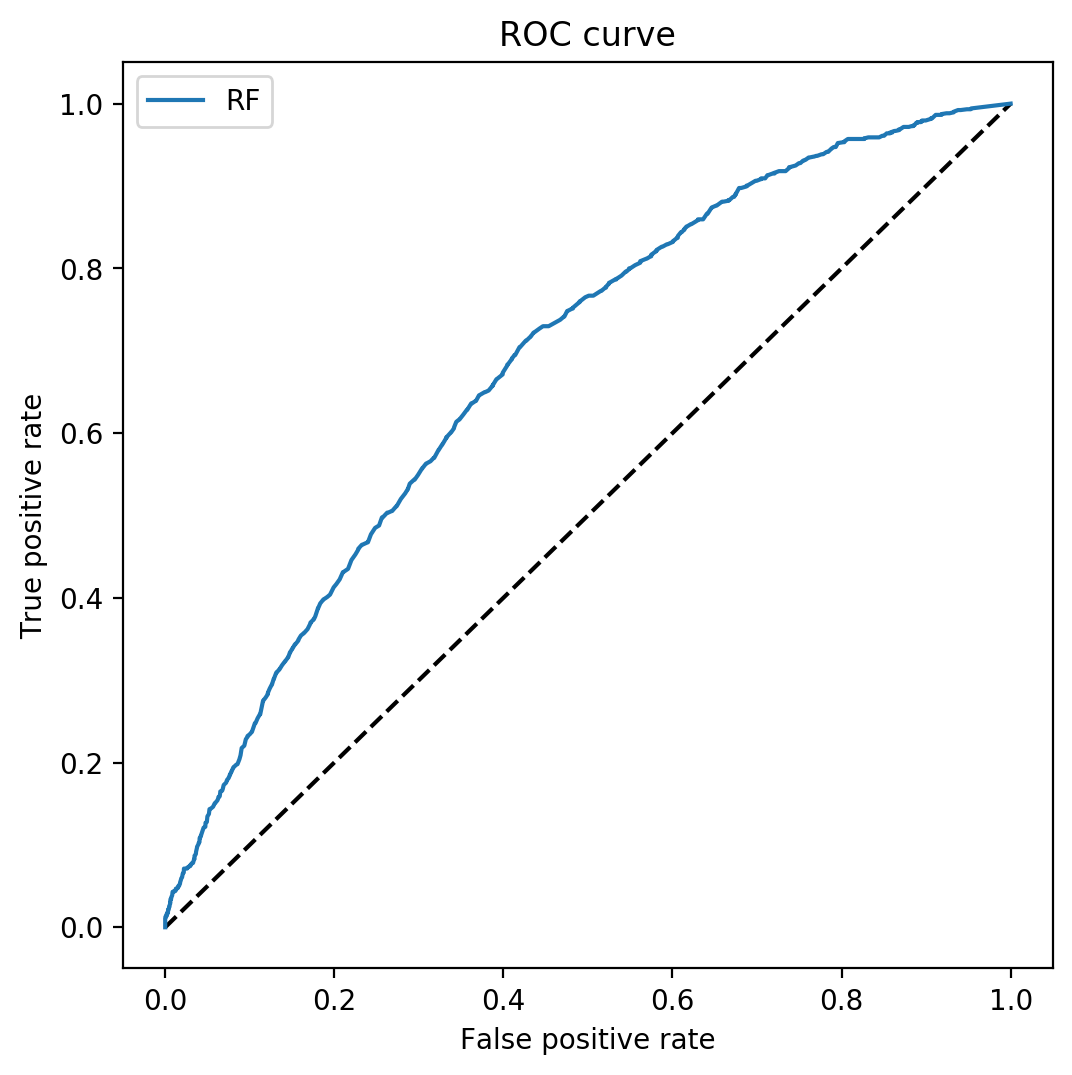

In [67]:

fpr, tpr, thresholds = roc_curve(y_test, pred_probs, pos_label=1)
plt.figure(figsize=(6, 6), dpi=200)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## K-Fold cross validation

In [68]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train , cv = 5)
accuracies.mean()

0.8106606566819048

In [69]:
accuracies.std()

0.0023127989105236517

## XGBoost

In [70]:
dm_train = xgb.DMatrix(X_train, y_train)
dm_val = xgb.DMatrix(X_test, y_test)
watchlist = [(dm_val, 'val')]
params = {
    'booster': 'gbtree',
    'objective': 'reg:linear',
    'subsample': 0.8,
    'colsample_bytree': 0.85,
    'eta': 0.05,
    'max_depth': 5,
    'silent': 0,
    'eval_metric': 'auc'
}

clf = xgb.train(params, dm_train, 500, watchlist, early_stopping_rounds=30)
y_pred_proba = clf.predict(dm_val, ntree_limit=clf.best_ntree_limit)
round(roc_auc_score(y_test, y_pred_proba), 5)

[17:47:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	val-auc:0.698229
Will train until val-auc hasn't improved in 30 rounds.
[1]	val-auc:0.701408
[2]	val-auc:0.703284
[3]	val-auc:0.703699
[4]	val-auc:0.703714
[5]	val-auc:0.705969
[6]	val-auc:0.706002
[7]	val-auc:0.705432
[8]	val-auc:0.707216


C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[9]	val-auc:0.707976
[10]	val-auc:0.70866
[11]	val-auc:0.70918
[12]	val-auc:0.70827
[13]	val-auc:0.707403
[14]	val-auc:0.707248
[15]	val-auc:0.70764
[16]	val-auc:0.708304
[17]	val-auc:0.708548
[18]	val-auc:0.708622
[19]	val-auc:0.708572
[20]	val-auc:0.70925
[21]	val-auc:0.709089
[22]	val-auc:0.709421
[23]	val-auc:0.709653
[24]	val-auc:0.709668
[25]	val-auc:0.709863
[26]	val-auc:0.709703
[27]	val-auc:0.709485
[28]	val-auc:0.709818
[29]	val-auc:0.710098
[30]	val-auc:0.709688
[31]	val-auc:0.709835
[32]	val-auc:0.710116
[33]	val-auc:0.710306
[34]	val-auc:0.710337
[35]	val-auc:0.710152
[36]	val-auc:0.710015
[37]	val-auc:0.709914
[38]	val-auc:0.709947
[39]	val-auc:0.710238
[40]	val-auc:0.710351
[41]	val-auc:0.710044
[42]	val-auc:0.709896
[43]	val-auc:0.710004
[44]	val-auc:0.710264
[45]	val-auc:0.710434
[46]	val-auc:0.710352
[47]	val-auc:0.710126
[48]	val-auc:0.710249
[49]	val-auc:0.71037
[50]	val-auc:0.710128
[51]	val-auc:0.710333
[52]	val-auc:0.709989
[53]	val-auc:0.710076
[54]	val-auc:0.71

0.71159

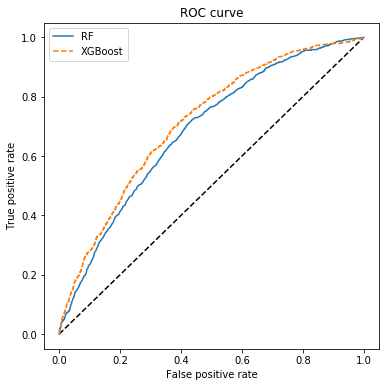

In [71]:
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
plt.figure(figsize=(6, 6), dpi=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.plot(fpr_xgb, tpr_xgb, '--',label='XGBoost')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

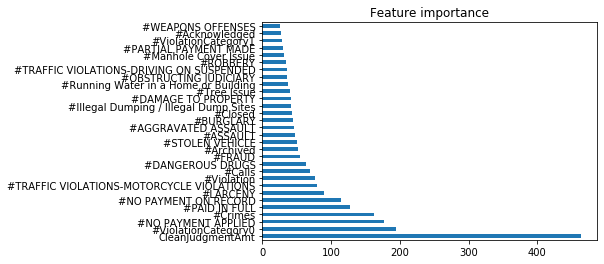

In [72]:
from xgboost.sklearn import XGBModel
from xgboost.core import Booster

importance_type='weight'
if isinstance(clf, XGBModel):
    importance = clf.booster().get_score(importance_type=importance_type)
elif isinstance(clf, Booster):
    importance = clf.get_score(importance_type=importance_type)
elif isinstance(clf, dict):
    importance = clf
    
feature_importance = pd.Series(importance, index=X_best.columns)
feature_importance.sort_values(inplace=True, ascending=False)
feature_importance.head(30).plot(kind='barh', title='Feature importance')

## Simplified XGBoost

In [73]:
X_best = best_df[['#Violation',
                     '#Crimes',
                     '#Calls',
                     '#ViolationCategory0',
                     '#ViolationCategory1',
                     'CleanJudgmentAmt',
                     #'#NO PAYMENT APPLIED',
                     #'#NO PAYMENT ON RECORD',
                     #'#PAID IN FULL',
                     #'#PARTIAL PAYMENT MADE',
                     #'#Archived',
                     #'#Closed',
                     #'#Acknowledged',
                     #'#Open',
                     'MeanCallRating']]

y_best = best_df['Blighted']

X_train, X_val, y_train, y_val = train_test_split(X_best, y_best, test_size=0.3, stratify = y_best)

In [74]:
dm_train = xgb.DMatrix(X_train, y_train)
dm_val = xgb.DMatrix(X_val, y_val)
watchlist = [(dm_val, 'val')]
params = {
    'booster': 'gbtree',
    'objective': 'reg:linear',
    'subsample': 0.8,
    'colsample_bytree': 0.85,
    'eta': 0.05,
    'max_depth': 4,
    'silent': 0,
    'eval_metric': 'auc'
}

clf = xgb.train(params, dm_train, 500, watchlist, early_stopping_rounds=30)
y_pred_proba = clf.predict(dm_val, ntree_limit=clf.best_ntree_limit)
round(roc_auc_score(y_test, y_pred_proba), 5)

[17:47:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	val-auc:0.689232
Will train until val-auc hasn't improved in 30 rounds.
[1]	val-auc:0.693427
[2]	val-auc:0.694499
[3]	val-auc:0.696059
[4]	val-auc:0.695075
[5]	val-auc:0.695527
[6]	val-auc:0.695696
[7]	val-auc:0.695791
[8]	val-auc:0.696859
[9]	val-auc:0.696573
[10]	val-auc:0.697533
[11]	val-auc:0.698095
[12]	val-auc:0.698492
[13]	val-auc:0.69893
[14]	val-auc:0.699875
[15]	val-auc:0.700156
[16]	val-auc:0.69975
[17]	val-auc:0.69987
[18]	val-auc:0.699763
[19]	val-auc:0.700341
[20]	val-auc:0.700583
[21]	val-auc:0.701086
[22]	val-auc:0.70095
[23]	val-auc:0.701101
[24]	val-auc:0.700956
[25]	val-auc:0.700596
[26]	val-auc:0.700407
[27]	val-auc:0.700423
[28]	val-auc:0.700329
[29]	val-auc:0.700046
[30]	val-auc:0.699973
[31]	val-auc:0.699755


C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[32]	val-auc:0.701474
[33]	val-auc:0.701517
[34]	val-auc:0.701311
[35]	val-auc:0.701256
[36]	val-auc:0.701206
[37]	val-auc:0.701274
[38]	val-auc:0.70115
[39]	val-auc:0.701219
[40]	val-auc:0.701546
[41]	val-auc:0.701576
[42]	val-auc:0.701491
[43]	val-auc:0.701357
[44]	val-auc:0.70141
[45]	val-auc:0.701261
[46]	val-auc:0.701394
[47]	val-auc:0.701352
[48]	val-auc:0.701403
[49]	val-auc:0.701631
[50]	val-auc:0.701824
[51]	val-auc:0.701884
[52]	val-auc:0.701757
[53]	val-auc:0.701757
[54]	val-auc:0.701597
[55]	val-auc:0.701479
[56]	val-auc:0.701667
[57]	val-auc:0.70142
[58]	val-auc:0.701539
[59]	val-auc:0.701632
[60]	val-auc:0.701669
[61]	val-auc:0.701692
[62]	val-auc:0.701625
[63]	val-auc:0.701438
[64]	val-auc:0.701517
[65]	val-auc:0.701449
[66]	val-auc:0.701344
[67]	val-auc:0.701247
[68]	val-auc:0.701262
[69]	val-auc:0.701426
[70]	val-auc:0.701516
[71]	val-auc:0.701466
[72]	val-auc:0.701479
[73]	val-auc:0.701431
[74]	val-auc:0.7015
[75]	val-auc:0.701731
[76]	val-auc:0.701738
[77]	val-auc:0.

0.50237

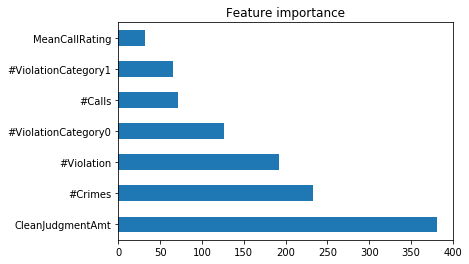

In [75]:
from xgboost.sklearn import XGBModel
from xgboost.core import Booster

importance_type='weight'
if isinstance(clf, XGBModel):
    importance = clf.booster().get_score(importance_type=importance_type)
elif isinstance(clf, Booster):
    importance = clf.get_score(importance_type=importance_type)
elif isinstance(clf, dict):
    importance = clf
    
feature_importance = pd.Series(importance, index=X_best.columns)
feature_importance.sort_values(inplace=True, ascending=False)
feature_importance.plot(kind='barh', title='Feature importance')

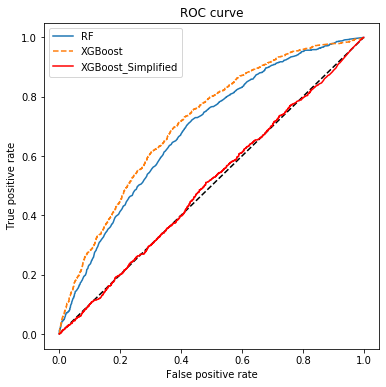

In [76]:
fpr_xgb_simplified, tpr_xgb_simplified, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
plt.figure(figsize=(6, 6), dpi=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.plot(fpr_xgb, tpr_xgb, '--',label='XGBoost')
plt.plot(fpr_xgb_simplified, tpr_xgb_simplified, 'r',label='XGBoost_Simplified')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [77]:
clf.feature_names

['#Violation',
 '#Crimes',
 '#Calls',
 '#ViolationCategory0',
 '#ViolationCategory1',
 'CleanJudgmentAmt',
 'MeanCallRating']